# Graduate  Students Admission  Prediction System

![](https://learnrhome.files.wordpress.com/2019/05/graduate.png)

### Purpose

To apply for a master's degree is a very expensive and intensive work. With this kernel, students will guess their capacities and they will decide whether to apply for a master's degree or not.


So, basically this set is about the Graduate Admissions data i.e. Given a set of standardized scores like GRE, TOEFL, SOP standard scores, LOR standard scores, what is probability of gaining admission into a particular university.

### Dataset

This dataset is created for prediction of graduate admissions and the dataset link is below:

* Features in the dataset:

* GRE Scores 

* TOEFL Scores 

* University Rating 

* Statement of Purpose 

* Letter of Recommendation 

* Undergraduate CGPA 

* Research Experience

* Chance of Admit 

### Step1: Data Collection/ Data Extraction

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import Dataset
data = pd.read_csv("Admission_Prediction_10k.csv")
data.shape

(11868, 8)

In [3]:
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit'], dtype=object)

### Step 2:  Data Analysis or Data Exploration

In [5]:
#Let's see top 10 observation row and column wise
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [6]:
# Let's see the detail information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
## General statistics of the data
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Text(0.5, 1.0, 'Correlation Factors Heat Map')

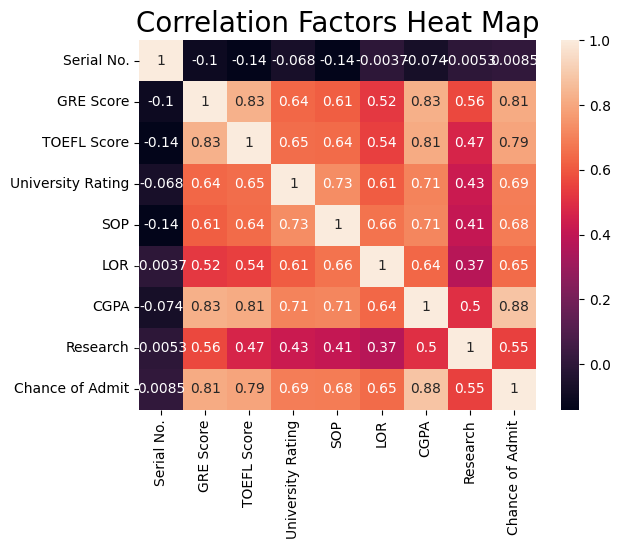

In [9]:
## Correlation coeffecients heatmap
sns.heatmap(data.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

##### GRE Scores

In [10]:
# Isolating GRE Score data
GRE = pd.DataFrame(data['GRE Score'])
GRE.describe()

,GRE Score
count,500.000000
mean,316.472000
std,11.295148
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


C:\Users\sarra\AppData\Local\Temp\ipykernel_5624\3724519442.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GRE).set_title('Probability Distribution for GRE Test Scores', size='20')


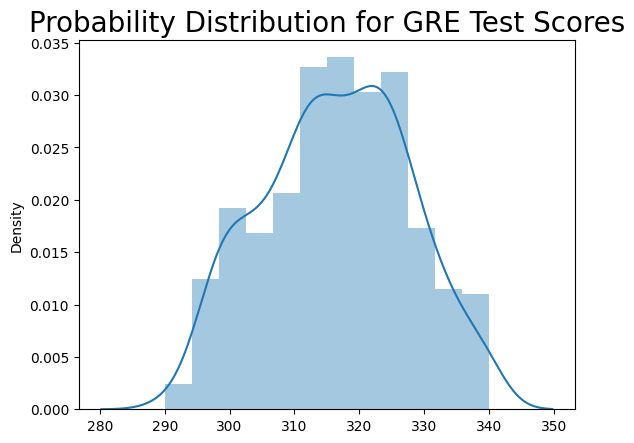

In [11]:
# # Probability Distribution
sns.distplot(GRE).set_title('Probability Distribution for GRE Test Scores', size='20')
plt.show()

As the distribution plot shows, the GRE test scores are somehow normally distributed.

In [12]:
# Correlation Coeffecients for GRE Score Test
GRE_CORR = pd.DataFrame(data.corr()['GRE Score'])
GRE_CORR.drop('GRE Score', axis=0, inplace=True)
GRE_CORR.rename({'GRE Score': 'GRE Correlation Coeff'}, axis=1, inplace=True)
GRE_CORR

,GRE Correlation Coeff
Serial No.,-0.103839
TOEFL Score,0.827200
University Rating,0.635376
SOP,0.613498
LOR,0.524679
CGPA,0.825878
Research,0.563398
Chance of Admit,0.810351


##### TOEFL Score


In [13]:
# Isolating and describing TOEFL Score
TOEFL = pd.DataFrame(data['TOEFL Score'], columns=['TOEFL Score'])
TOEFL.describe()

,TOEFL Score
count,500.000000
mean,107.192000
std,6.081868
min,92.000000
25%,103.000000
50%,107.000000
75%,112.000000
max,120.000000


C:\Users\sarra\AppData\Local\Temp\ipykernel_5624\4119129779.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TOEFL).set_title('Probability Distribution for TOEFL Scores', size='20')


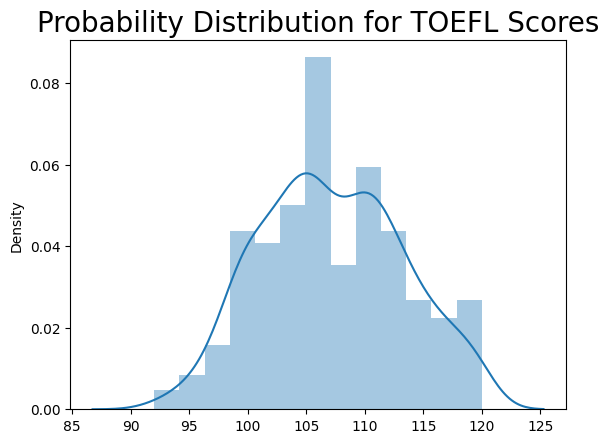

In [14]:
# Probability distribution for TOEFL Scores
sns.distplot(TOEFL).set_title('Probability Distribution for TOEFL Scores', size='20')
plt.show()

##### Research

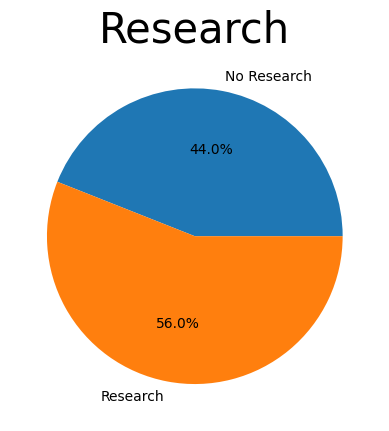

In [15]:
RES_Count = data.groupby(['Research']).count()
RES_Count = RES_Count['GRE Score']
RES_Count = pd.DataFrame(RES_Count)
RES_Count.rename({'GRE Score': 'Count'}, axis=1, inplace=True)
RES_Count.rename({0: 'No Research', 1:'Research'}, axis=0, inplace=True)
plt.pie(x=RES_Count['Count'], labels=RES_Count.index, autopct='%1.1f%%')
plt.title('Research', pad=5, size=30)
plt.show()

##### University Rating

In [16]:
# Isolating and describing 
University_Rating = data.groupby(['University Rating']).count()
University_Rating = University_Rating['GRE Score']
University_Rating = pd.DataFrame(University_Rating)
University_Rating.rename({'GRE Score': 'Count'}, inplace=True, axis=1)
University_Rating

,Count
University Rating,
1,34
2,126
3,162
4,105
5,73


How good the university is a value between 1 and 5 in integer increment , and since it has positive correlation factors with other variables it's clear that 5 is the highest rating and 1 is the lowest.

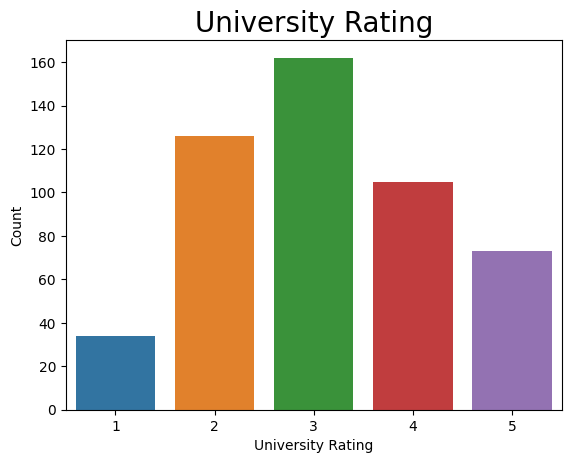

In [17]:
# Barplot for the distribution of the University Rating
sns.barplot(x=University_Rating.index, y=University_Rating['Count']).set_title('University Rating', size='20')
plt.show()

##### SOP
Statement of Purpose (SOP) is a letter written by the student himself to state his purpose and motivation for completing a graduate degree in addition to his goals while and after he completes his study. Many universities find this letter significant because it better describe the student from a personal perspective.

In [18]:
#Isolating and describing
SOP = pd.DataFrame(data.groupby(['SOP']).count()['GRE Score'])
SOP.rename({'GRE Score':'Count'}, axis=1, inplace=True)
SOP

,Count
SOP,
1.0,6
1.5,25
2.0,43
2.5,64
3.0,80
3.5,88
4.0,89
4.5,63
5.0,42


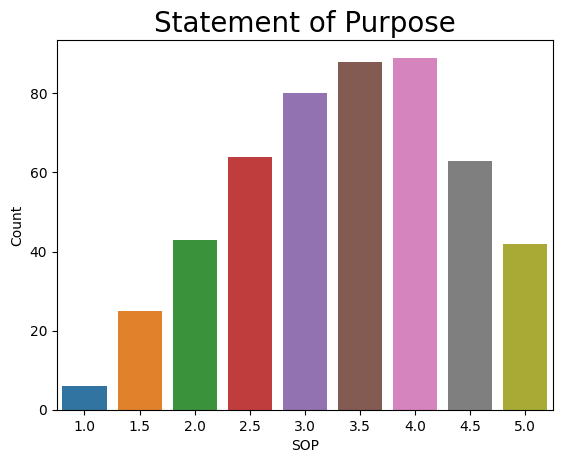

In [19]:
# Barplot for SOP 
sns.barplot(x=SOP.index, y=SOP['Count']).set_title('Statement of Purpose', size='20')
plt.show()

##### LOR

In [20]:
LOR = pd.DataFrame(data.groupby(['LOR']).count()['GRE Score'])
LOR.rename({'GRE Score':'Count'}, axis=1, inplace=True)
LOR

,Count
LOR,
1.0,1
1.5,11
2.0,46
2.5,50
3.0,99
3.5,86
4.0,94
4.5,63
5.0,50


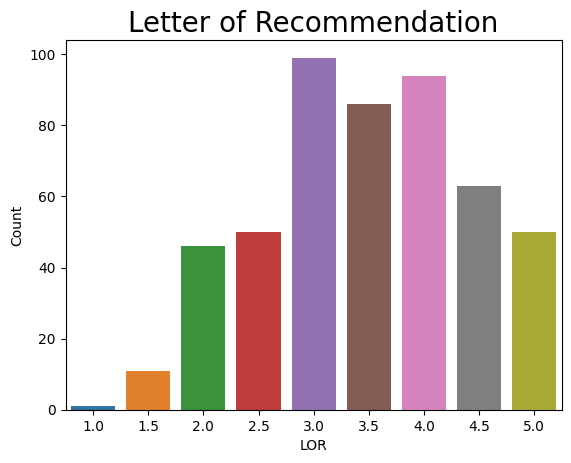

In [21]:
# Distribution of the LOR
sns.barplot(x=LOR.index,y=LOR['Count']).set_title('Letter of Recommendation', size='20')
plt.show()

##### CGPA
Cumulative Grade Points Average (CGPA) is a measure of a student's marks thus his performance in his undergraduate degree.

In [22]:
# Isolating and describing the CGPA
CGPA = pd.DataFrame(data['CGPA'], columns=['CGPA'])
CGPA.describe()

,CGPA
count,500.000000
mean,8.576440
std,0.604813
min,6.800000
25%,8.127500
50%,8.560000
75%,9.040000
max,9.920000


C:\Users\sarra\AppData\Local\Temp\ipykernel_5624\2542491028.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LOR).set_title('Probability Distribution Plot for CGPA', size='20')


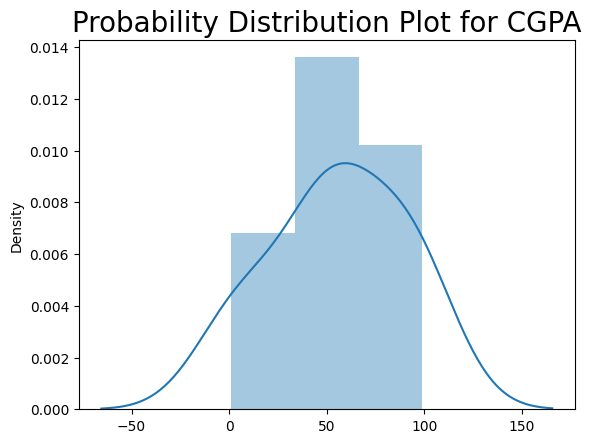

In [23]:
sns.distplot(LOR).set_title('Probability Distribution Plot for CGPA', size='20')
plt.show()

##### Chance of Admission

C:\Users\sarra\AppData\Local\Temp\ipykernel_5624\2278635879.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Chance of Admit']).set_title('Probability Distribution of Chance of Admit', size='20')


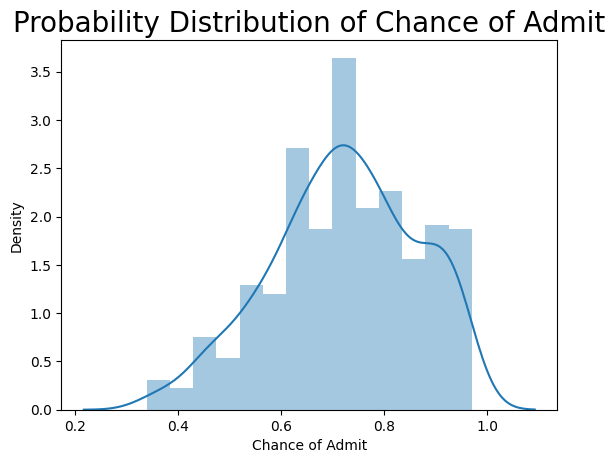

In [24]:
data['Chance of Admit']
sns.distplot(data['Chance of Admit']).set_title('Probability Distribution of Chance of Admit', size='20')
plt.show()

In [25]:
data.describe()['Chance of Admit']

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64

And since one of our goals is to predict the chance of admission, let's take a look on how the different variables correlate with it.

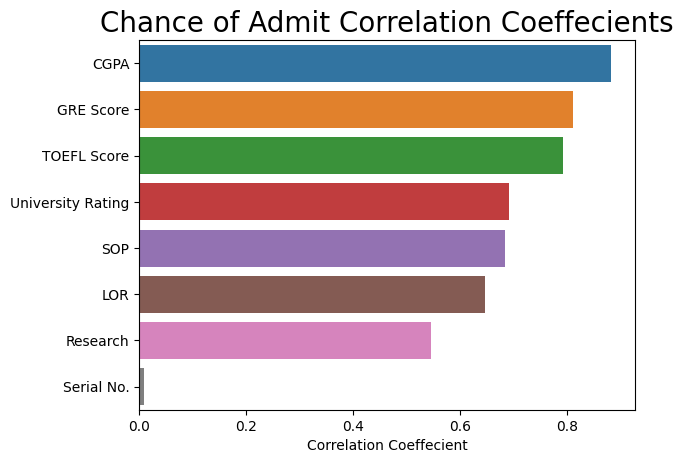

In [26]:
COA_corr = pd.DataFrame(data.corr()['Chance of Admit'])
COA_corr.rename({'Chance of Admit': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Chance of Admit', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sns.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Chance of Admit Correlation Coeffecients', size='20')
plt.show()

It is evident that the most contribution factors to the chance of admission are CGPA, GRE Score and TOEFL Score

In [27]:
COA_corr

,Correlation Coeffecient
CGPA,0.882413
GRE Score,0.810351
TOEFL Score,0.792228
University Rating,0.690132
SOP,0.684137
LOR,0.645365
Research,0.545871
Serial No.,0.008505


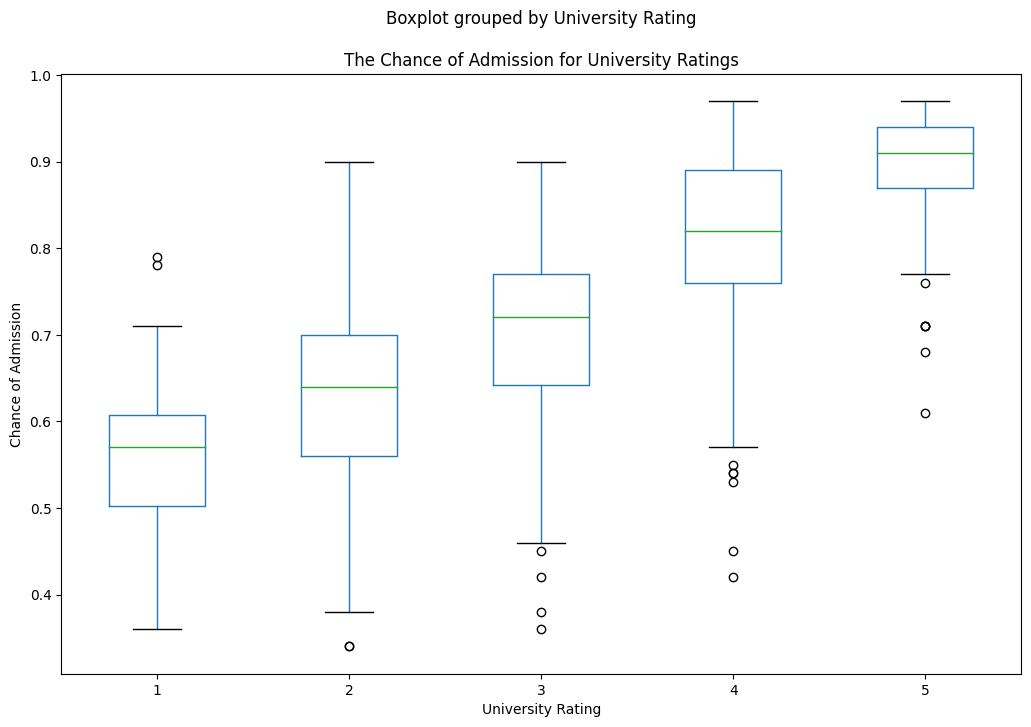

In [28]:
data.boxplot(column='Chance of Admit',by='University Rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

## Prediction Models : Reegression Algorithm (Supervised Machine Learning)

Support Vector Reegression


### Preparing Data for Classification

In [29]:
data = data.drop('Serial No.', axis=1)

In [30]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

## **Storing Feature matrix in X and Target in Y**

---



---


In [31]:
X = data.drop('Chance of Admit', axis=1)
y = data['Chance of Admit']

In [32]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

### Splitting data set in train and test

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Feature Scaling

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(data)
X_transformed = sc.transform(data)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Importing Models**
---

In [35]:
from sklearn.svm import SVR

## Training model

In [36]:
svr_model = SVR(kernel='poly',degree=3, gamma=0.01,coef0=4.0,tol=1e-3,epsilon=1e-5,shrinking=False,cache_size=200,verbose=True,max_iter=-1, C=0.1)
svr_model.fit(X_train, y_train)

[LibSVM]

SVR(C=0.1, coef0=4.0, epsilon=1e-05, gamma=0.01, kernel='poly', shrinking=False,
    verbose=True)

## Prediction

In [37]:
y_pred = svr_model.predict(X_test)

# **Evaluating Model**

In [38]:
from sklearn import metrics
score1 = metrics.r2_score(y_test, y_pred)

In [39]:
print(score1*100)

81.73079049163333


In [40]:
final_data = pd.DataFrame ({'Model' : ['SVR'],
                            'R2_SCORE' : [score1*100]})

In [41]:
final_data

,Model,R2_SCORE
0,SVR,81.73079


<Axes: xlabel='Model', ylabel='R2_SCORE'>

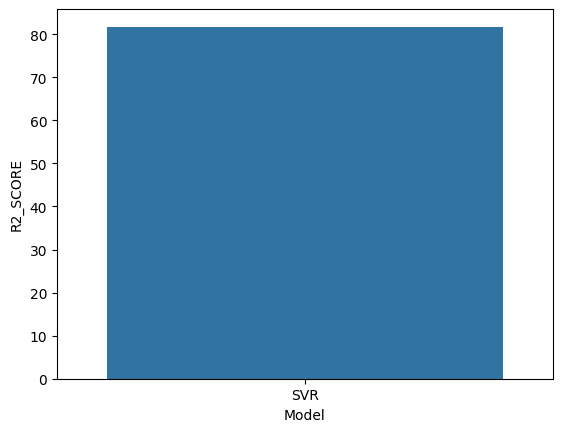

In [42]:
import seaborn as sns
sns.barplot(x=final_data['Model'], y=final_data['R2_SCORE'])

## **Save the Model**

In [43]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [44]:
X = data.drop('Chance of Admit', axis=1)
y = data['Chance of Admit']

In [45]:
X = sc.fit_transform(X)

In [46]:
import  joblib
joblib.dump(svr_model, 'prediction_model')

['prediction_model']

In [47]:
model = joblib.load('prediction_model')

In [49]:
joblib.dump(sc, "scaler.pkl")

['scaler.pkl']

In [51]:
y_test.reset_index(drop=True, inplace=True) # reset the index of y_test
# show the actual and predicted values
for i in range(len(y_test)):
    print("Actual value: {:.2f}, Predicted value: {:.2f}".format(y_test[i], y_pred[i]))

Actual value: 0.93, Predicted value: 0.91
Actual value: 0.84, Predicted value: 0.81
Actual value: 0.39, Predicted value: 0.59
Actual value: 0.77, Predicted value: 0.71
Actual value: 0.74, Predicted value: 0.82
Actual value: 0.89, Predicted value: 0.87
Actual value: 0.47, Predicted value: 0.50
Actual value: 0.57, Predicted value: 0.65
Actual value: 0.68, Predicted value: 0.83
Actual value: 0.82, Predicted value: 0.81
Actual value: 0.45, Predicted value: 0.72
Actual value: 0.77, Predicted value: 0.73
Actual value: 0.61, Predicted value: 0.66
Actual value: 0.94, Predicted value: 0.94
Actual value: 0.89, Predicted value: 0.83
Actual value: 0.49, Predicted value: 0.52
Actual value: 0.87, Predicted value: 0.86
Actual value: 0.65, Predicted value: 0.59
Actual value: 0.54, Predicted value: 0.55
Actual value: 0.57, Predicted value: 0.56
Actual value: 0.67, Predicted value: 0.67
Actual value: 0.54, Predicted value: 0.55
Actual value: 0.68, Predicted value: 0.73
Actual value: 0.79, Predicted valu

In [52]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [53]:
# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: {}".format(mse))

score2 = metrics.r2_score(y_test, y_pred)
print('R2_score: ',score2)
# Calculate RMSE
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
print('Root Mean Squared Error: {:.2f}'.format(rmse))
#Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean squared error: 0.003566470064891112
R2_score:  0.8173079049163333
Root Mean Squared Error: 0.06
Mean Absolute Error: 0.04192077664496303


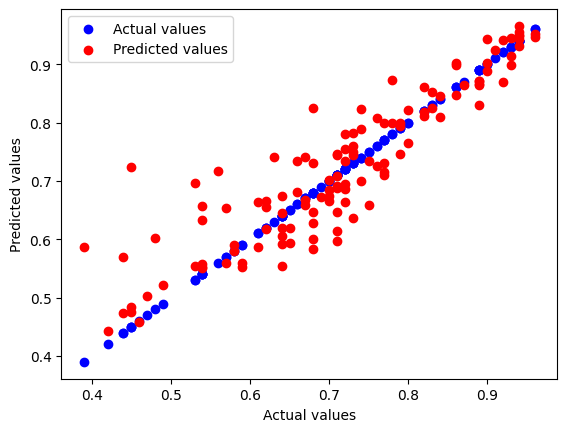

In [54]:
import matplotlib.pyplot as plt

# plot the actual values in blue
plt.scatter(y_test, y_test, color='blue', label='Actual values')

# plot the predicted values in red
plt.scatter(y_test, y_pred, color='red', label='Predicted values')

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

# ***Test UI***
---


In [55]:
from tkinter import *
import joblib
from sklearn.preprocessing import StandardScaler

In [56]:
def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())

    model = joblib.load('prediction_model')
    result = model.predict(sc.transform([[p1,p2,p3,p4,p5,p6,p7]]))

    Label(master, text=f"Your chances of admission are {result}").grid(row=31)

master = Tk()
master.title('Graduate Admission Analysis and Prediction')
label = Label(master, text = 'Graduate Admission Analysis and Prediction', bg = 'black', fg = 'white').grid(row=0,columnspan=2)

Label(master, text = 'Enter Your GRE Score').grid(row=1)
Label(master, text = 'Enter Your TOEFL Score').grid(row=2)
Label(master, text = 'Enter University Rating').grid(row=3)
Label(master, text = 'Enter SOP').grid(row=4)
Label(master, text = 'Enter LOR').grid(row=5)
Label(master, text = 'Enter Your CGPA').grid(row=6)
Label(master, text = 'Research Work(0/1)').grid(row=7)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)

Button(master,text="Predict", command=show_entry).grid()

mainloop()

## Connection with UI

In [57]:
import pickle

In [58]:
with open('svr_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [59]:
with open('svr_model.pkl', 'rb') as f:
    model = pickle.load(f)